오차 행렬

[[91 27]
 [14 47]]

정확도: 0.7709, 정밀도: 0.6351, 재현율: 0.7705, F1: 0.6963, AUC:0.7708


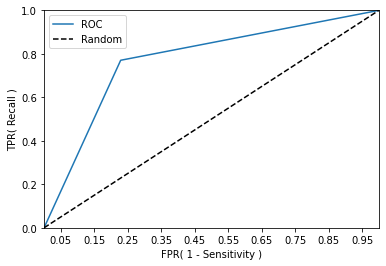

오차 행렬

[[105  13]
 [ 12  49]]

정확도: 0.8603, 정밀도: 0.7903, 재현율: 0.8033, F1: 0.7967, AUC:0.8466


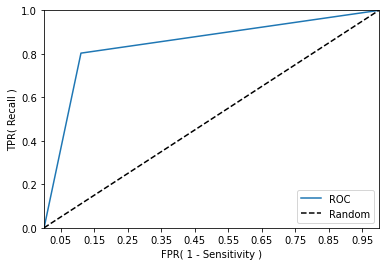

오차 행렬

[[106  12]
 [ 14  47]]

정확도: 0.8547, 정밀도: 0.7966, 재현율: 0.7705, F1: 0.7833, AUC:0.8344


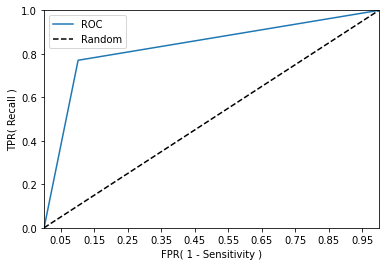

오차 행렬

[[92 26]
 [10 51]]

정확도: 0.7989, 정밀도: 0.6623, 재현율: 0.8361, F1: 0.7391, AUC:0.8079


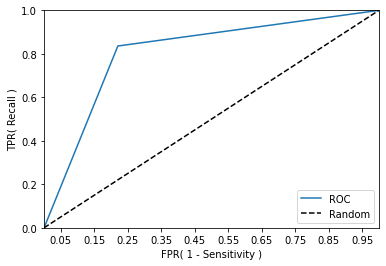

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    df['Embarked'] = df['Embarked'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


def roc_curve_plot(y_test , pred):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


def get_clf_eval(name, y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print()
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return [name, accuracy, precision, recall, f1, roc_auc]

def result_compare(_from, _to, increase):
    print('##############################################################################################')
    print('##{0} 대비 {1} 에 대한 평가##\n'.format(_from, _to))
    print('정확도_증감: {0:.4f}, 정밀도_증감: {1:.4f}, 재현율_증감: {2:.4f}, F1_증감: {3:.4f}, AUC_증감:{4:.4f}'.format(*increase))
    print('##############################################################################################')
    

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

result = list()
#--------
dt_clf = ExtraTreeClassifier()

dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)

dt_result = get_clf_eval("ExtraTreeClassifier", y_test , dt_pred)
roc_curve_plot(y_test , dt_pred)

result.append(dt_result)
#--------
lr_clf = AdaBoostClassifier()

lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)

lr_result = get_clf_eval("AdaBoostClassifier", y_test , lr_pred)
roc_curve_plot(y_test , lr_pred)

result.append(lr_result)
#--------
rc_clf = RidgeClassifier()

rc_clf.fit(X_train , y_train)
rc_pred = rc_clf.predict(X_test)

rc_result = get_clf_eval("RidgeClassifier", y_test , rc_pred)
roc_curve_plot(y_test , rc_pred)

result.append(rc_result)
#--------
pa_clf = PassiveAggressiveClassifier()

pa_clf.fit(X_train , y_train)
pa_pred = pa_clf.predict(X_test)

pa_result = get_clf_eval("PassiveAggressiveClassifier", y_test , pa_pred)
roc_curve_plot(y_test , pa_pred)

result.append(pa_result)
#======

#increase = np.array(rc_result) - np.array(lr_result)
# print(np.array(rc_result) - np.array(lr_result))
#result_compare("LogisticRegression", "RidgeClassifier", list(increase))

In [3]:
from pandas import DataFrame
print(result)

resultNP = np.array(result)

print(resultNP.T[1:].tolist())

# result[1].argmax()

df = DataFrame (resultNP.tolist(), columns=["classname", '정확도', '정밀도', '재현율', 'F1', 'AUC'])
# df = DataFrame (resultNP.tolist(), columns=["classname", 'A', 'B', 'C', 'F1', 'AUC'])
df.set_index("classname", inplace=True)
df

[['ExtraTreeClassifier', 0.770949720670391, 0.6351351351351351, 0.7704918032786885, 0.6962962962962963, 0.7708391219783273], ['AdaBoostClassifier', 0.8603351955307262, 0.7903225806451613, 0.8032786885245902, 0.7967479674796747, 0.8465545984995831], ['RidgeClassifier', 0.8547486033519553, 0.7966101694915254, 0.7704918032786885, 0.7833333333333333, 0.8343984440122256], ['PassiveAggressiveClassifier', 0.7988826815642458, 0.6623376623376623, 0.8360655737704918, 0.7391304347826089, 0.8078632953598222]]
[['0.770949720670391', '0.8603351955307262', '0.8547486033519553', '0.7988826815642458'], ['0.6351351351351351', '0.7903225806451613', '0.7966101694915254', '0.6623376623376623'], ['0.7704918032786885', '0.8032786885245902', '0.7704918032786885', '0.8360655737704918'], ['0.6962962962962963', '0.7967479674796747', '0.7833333333333333', '0.7391304347826089'], ['0.7708391219783273', '0.8465545984995831', '0.8343984440122256', '0.8078632953598222']]


,정확도,정밀도,재현율,F1,AUC
classname,,,,,
ExtraTreeClassifier,0.770949720670391,0.6351351351351351,0.7704918032786885,0.6962962962962963,0.7708391219783273
AdaBoostClassifier,0.8603351955307262,0.7903225806451613,0.8032786885245902,0.7967479674796747,0.8465545984995831
RidgeClassifier,0.8547486033519553,0.7966101694915254,0.7704918032786885,0.7833333333333333,0.8343984440122256
PassiveAggressiveClassifier,0.7988826815642458,0.6623376623376623,0.8360655737704918,0.7391304347826089,0.8078632953598222


In [4]:
df.describe()

,정확도,정밀도,재현율,F1,AUC
count,4,4,4,4,4
unique,4,4,3,4,4
top,0.8547486033519553,0.7903225806451613,0.7704918032786885,0.7833333333333333,0.8343984440122256
freq,1,1,2,1,1


In [5]:
df['정확도'].max()
# df['정확도'].astype(float).idxmax(axis=1)
df['정확도'].astype(float).idxmax()
print("각 항목별 최고 분류기는\n")
print("------------------\n")
print(df.astype(float).idxmax())
print("------------------\n")
# df['정확도'].ID
# print(df['정확도'].idxmax)
# df.Value
# type(df)
# df.iloc[df.Value.argmax(), 0:2]

각 항목별 최고 분류기는

------------------

정확도             AdaBoostClassifier
정밀도                RidgeClassifier
재현율    PassiveAggressiveClassifier
F1              AdaBoostClassifier
AUC             AdaBoostClassifier
dtype: object
------------------

